# Importing Header and SoilPrep

In [1]:
import import_ipynb 
from Header import *

importing Jupyter notebook from Header.ipynb


In [2]:
import import_ipynb
from SoilPrep import * 

importing Jupyter notebook from SoilPrep.ipynb


# Step 0: Setting up decision parameters (Data Tree)

In [3]:
# 0. Available smoothing filter types: savgol1 and savgol2 ------------------------ (0)
sg_filters = ['sg1', 'sg2']

# 0. Available window lengths for the smoothing filter ---------------------------- (0)
window_lengths = [0, 1, 11, 21, 31, 41, 51]

# 1. Available machine learning regression models --------------------------------- (1)
ml_methods = ['mult', 'cubist', 'svr',  'ridge', 'plsr', 'randomforest',  'gbrt']

# 2. Names of target variables in the dataframe ----------------------------------- (2)
target_names = ['Sand', 'Silt', 'Clay', 'TOC', 'CaCO3']

# 3. Available preprocessing for Target data -------------------------------------- (3)
#prepare_target = ['none', 'minmax']
prepare_target = ['none']
# 4. Available preprocessing for Spectral data ------------------------------------ (4)
prepare_spec = ['none', 'fod2', 'cr', 'log']

# 5. Resampling bands available for spectra --------------------------------------- (5) 
nbands_sampling = [0,2,3,5,7,9,10,11,13,15,17,19,20,21,23,25,27,29,30,31,33,35,37,39, 40, 45, 50, 55, 60, 70, 80, 90, 100]


# Setting colours for different targets        --------------------------------------
clr = ['#F4A460', '#8B7355', '#A52A2A', 'green', 'blue']

# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [4]:
MetaData = {'sg_filters' : sg_filters, 'window_lengths' : window_lengths, 'prepare_spec' : prepare_spec, \
            'nbands_sampling' : nbands_sampling, 'target_names' : target_names, 'prepare_target' : prepare_target,\
            'ml_methods' : ml_methods, 'clr' : clr}

with open ('meta_data.pickle', 'wb') as file:
    pickle.dump(MetaData, file)

# Step 1a: Obtaining Spectra (Noise and Outliers removal)

In [5]:
legacy_spec = pd.read_csv('spectra.csv')
legacy_tar = pd.read_csv('targets.csv')

legacy_spec.rename(columns= {'sample':'id'}, inplace=True)
legacy_tar.rename(columns = {'SOIL': 'id', 'CLAI':'Clay', 'SILT': 'Silt', 'SAND': 'Sand', 'OC': 'TOC', 'CACO3':'CaCO3'}, inplace = True)

In [6]:
legacy_spec = legacy_spec.set_index('id', drop=True)
legacy_tar = legacy_tar.set_index('id', drop=True)

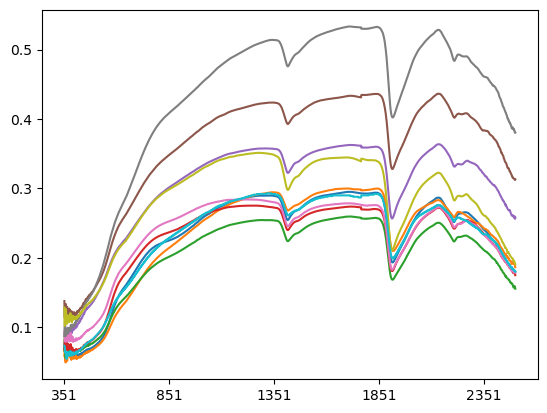

In [7]:
for i in range (0,10,1):
    legacy_spec.iloc[i,1:].plot()

In [8]:
legacy_spectra = legacy_spec.iloc[:, 101::].copy()
legacy_spectra.head(2)

,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A1,0.066222,0.066322,0.066222,0.066122,0.066522,0.066922,0.067422,0.068022,0.067578,0.066922,0.067422,0.067322,0.067322,0.067922,0.067622,0.067822,0.068622,0.068122,0.068122,0.068622,0.069404,0.069322,0.069022,0.069022,0.069322,0.069522,0.069622,0.069622,0.069822,0.070122,0.070322,0.070422,0.070722,0.071222,0.071222,0.071222,0.071422,0.071522,0.071622,0.071922,0.072322,0.072622,0.072822,0.073022,0.073122,0.073322,0.073622,0.073722,0.073991,0.074322,...,0.198465,0.197661,0.196834,0.196530,0.196182,0.195595,0.195123,0.194908,0.194592,0.193903,0.193152,0.192428,0.191843,0.191818,0.191789,0.191838,0.191824,0.191501,0.191119,0.190578,0.19013,0.190035,0.189680,0.188474,0.187274,0.186151,0.185481,0.186149,0.186492,0.185993,0.185726,0.185862,0.186042,0.186245,0.186060,0.185331,0.184433,0.183245,0.182729,0.183108,0.182604,0.180906,0.179802,0.179577,0.179448,0.179298,0.179278,0.179380,0.179692,0.180275
A2,0.062870,0.063270,0.063270,0.062870,0.062970,0.063370,0.064170,0.064770,0.064170,0.063370,0.064370,0.064270,0.064170,0.065070,0.064770,0.064870,0.065385,0.065170,0.065023,0.065170,0.065870,0.065770,0.065670,0.066100,0.066270,0.066370,0.066470,0.066970,0.067070,0.067070,0.067170,0.067170,0.067470,0.068070,0.068082,0.068035,0.068070,0.068331,0.068470,0.068570,0.069070,0.069470,0.069670,0.069770,0.069970,0.070170,0.070370,0.070470,0.070870,0.071232,...,0.205569,0.205255,0.204990,0.205285,0.205434,0.204261,0.203190,0.202188,0.201262,0.201817,0.202313,0.202066,0.201720,0.200781,0.199900,0.199475,0.199150,0.199420,0.199386,0.198038,0.19689,0.196577,0.196325,0.196292,0.196133,0.195575,0.195193,0.195342,0.195309,0.194835,0.193872,0.191836,0.191037,0.192613,0.193641,0.193872,0.193701,0.192865,0.192286,0.192020,0.191992,0.192217,0.191915,0.191090,0.190970,0.191688,0.190903,0.188633,0.187193,0.186471


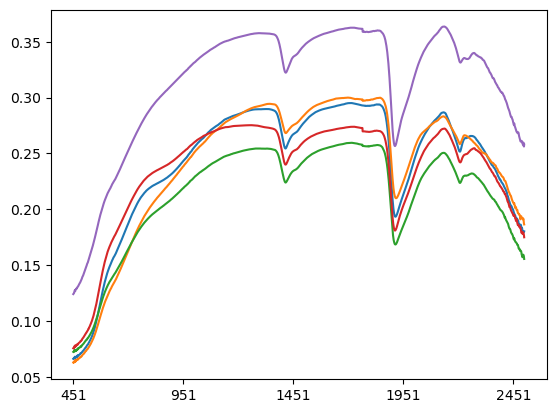

In [9]:
for i in range (0,5,1):
    legacy_spectra.iloc[i,:].plot()

In [10]:
legacy_tar = legacy_tar[['Clay', 'Silt', 'Sand', 'TOC', 'CaCO3']]
legacy_tar.head(2)

,Clay,Silt,Sand,TOC,CaCO3
id,,,,,
E1,13.9719,0.0000,86.0281,0.59,1.83
E2,8.8638,2.5181,88.6180,0.17,0.00


In [11]:
print(legacy_spectra.shape)
print(legacy_tar.shape)

# Note that some id are missing in the data so we will do preprocessing to fix it ---------

(89, 2050)
(91, 5)


In [12]:
# Missing ID's are taken care by setting the index to ID and obtaining inner join.


legacy_fr = pd.merge(legacy_tar, legacy_spectra, on = 'id', how = 'inner')

legacy_fr.reset_index(inplace = True)
legacy_fr .head(2)

,id,Clay,Silt,Sand,TOC,CaCO3,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,E1,13.9719,0.0000,86.0281,0.59,1.83,0.0605,0.0611,0.0618,0.0624,0.0624,0.0625,0.0628,0.0632,0.0631,0.0630,0.0637,0.0637,0.0638,0.0643,0.0643,0.0645,0.0648,0.0653,0.0653,0.0652,0.0655,0.0658,0.0659,0.0657,0.0663,0.0665,0.0664,0.0669,0.0673,0.0676,0.0676,0.0680,0.0684,0.0687,0.0686,0.0688,0.0693,0.0696,0.0699,0.0702,0.0707,0.0712,0.0715,0.0716,...,0.35,0.349,0.348,0.347,0.346,0.345,0.345,0.344,0.343,0.343,0.342,0.342,0.341,0.340,0.339,0.339,0.338,0.338,0.337,0.337,0.336,0.335,0.334,0.333,0.333,0.332,0.332,0.331,0.330,0.329,0.328,0.328,0.327,0.327,0.327,0.326,0.326,0.325,0.325,0.324,0.323,0.323,0.322,0.321,0.321,0.321,0.32,0.319,0.319,0.32
1,E2,8.8638,2.5181,88.6180,0.17,0.00,0.0640,0.0642,0.0644,0.0649,0.0651,0.0654,0.0658,0.0655,0.0656,0.0659,0.0666,0.0666,0.0667,0.0674,0.0675,0.0675,0.0675,0.0679,0.0682,0.0684,0.0686,0.0687,0.0688,0.0692,0.0694,0.0696,0.0698,0.0701,0.0704,0.0706,0.0707,0.0708,0.0711,0.0716,0.0720,0.0724,0.0728,0.0731,0.0734,0.0736,0.0742,0.0748,0.0752,0.0755,...,0.38,0.380,0.379,0.378,0.378,0.377,0.376,0.375,0.374,0.374,0.373,0.372,0.372,0.371,0.370,0.370,0.370,0.369,0.368,0.367,0.366,0.365,0.365,0.364,0.364,0.363,0.362,0.362,0.361,0.360,0.359,0.358,0.358,0.357,0.357,0.356,0.356,0.356,0.356,0.355,0.354,0.354,0.353,0.352,0.351,0.350,0.35,0.351,0.351,0.35


In [13]:
print('Missing:', legacy_fr.isnull().sum().sum())   # alternate to previous (inferred from next command)
print(legacy_fr.isnull().sum()) # isnull applies to df but isnan applies only to ndarray

legacy_fr.dropna(axis=0, inplace = True)

Missing: 3
id      0
Clay    1
Silt    1
Sand    1
TOC     0
       ..
2496    0
2497    0
2498    0
2499    0
2500    0
Length: 2056, dtype: int64


In [14]:
spectra = legacy_fr.iloc[:, 6::]
spectra.head(2)

,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,0.0605,0.0611,0.0618,0.0624,0.0624,0.0625,0.0628,0.0632,0.0631,0.0630,0.0637,0.0637,0.0638,0.0643,0.0643,0.0645,0.0648,0.0653,0.0653,0.0652,0.0655,0.0658,0.0659,0.0657,0.0663,0.0665,0.0664,0.0669,0.0673,0.0676,0.0676,0.0680,0.0684,0.0687,0.0686,0.0688,0.0693,0.0696,0.0699,0.0702,0.0707,0.0712,0.0715,0.0716,0.0721,0.0727,0.0733,0.0734,0.0737,0.0742,...,0.35,0.349,0.348,0.347,0.346,0.345,0.345,0.344,0.343,0.343,0.342,0.342,0.341,0.340,0.339,0.339,0.338,0.338,0.337,0.337,0.336,0.335,0.334,0.333,0.333,0.332,0.332,0.331,0.330,0.329,0.328,0.328,0.327,0.327,0.327,0.326,0.326,0.325,0.325,0.324,0.323,0.323,0.322,0.321,0.321,0.321,0.32,0.319,0.319,0.32
1,0.0640,0.0642,0.0644,0.0649,0.0651,0.0654,0.0658,0.0655,0.0656,0.0659,0.0666,0.0666,0.0667,0.0674,0.0675,0.0675,0.0675,0.0679,0.0682,0.0684,0.0686,0.0687,0.0688,0.0692,0.0694,0.0696,0.0698,0.0701,0.0704,0.0706,0.0707,0.0708,0.0711,0.0716,0.0720,0.0724,0.0728,0.0731,0.0734,0.0736,0.0742,0.0748,0.0752,0.0755,0.0758,0.0763,0.0769,0.0774,0.0779,0.0785,...,0.38,0.380,0.379,0.378,0.378,0.377,0.376,0.375,0.374,0.374,0.373,0.372,0.372,0.371,0.370,0.370,0.370,0.369,0.368,0.367,0.366,0.365,0.365,0.364,0.364,0.363,0.362,0.362,0.361,0.360,0.359,0.358,0.358,0.357,0.357,0.356,0.356,0.356,0.356,0.355,0.354,0.354,0.353,0.352,0.351,0.350,0.35,0.351,0.351,0.35


# Step 1b: Obtaining Targets (Outliers removal and Normalization)

In [15]:
df = legacy_fr
# ------------- Target Isolation ----------------------

clr = ['#F4A460', '#8B7355', '#A52A2A', 'green', 'blue']

def isolate_targets(df, target_names):
    T=[]
    for i in range (0,len(target_names)):
        T.append(df[target_names[i]])
    return(T)
    
T = isolate_targets(df,target_names) 

def normalize_targets(T):          
    NT =[]
    for i in range(0, len(T)):
        NT.append(min_max_normal(T[i].copy()))
    return(NT)

NT = normalize_targets(T)


def find_y(t):
    i = target_names.index(t) 
    y = T[i]
    return y

# Step 1c: Spectra Preprocessing (Smooth, FOD/Contin/Log , and Resample)

## Savgol smoothing (order 1 and order 2)

In [16]:
# -------------- Smoothed Spectra spec1 (savgol order 1) and spec2 (savgol order 2)  -----------

spec1 = {}
for i in window_lengths:
    spec1[i] = filt_sg(spectra, i, 'sg1')                   

spec2 = {}
for i in window_lengths:
    spec2[i] = filt_sg(spectra, i, 'sg2')

smth_spec = sgsmooth (spectra, 3)    

## First Order Derivative

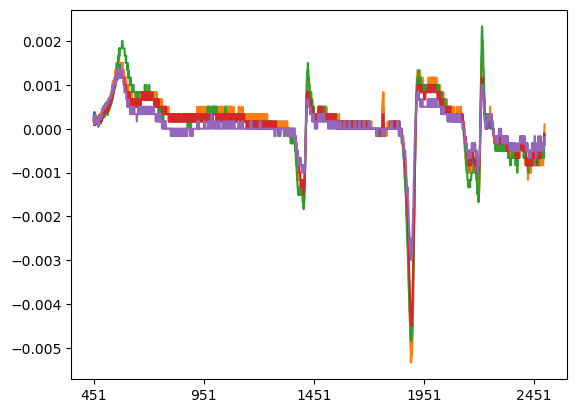

In [17]:
fod_spec = fod(smth_spec)

for i in range (0,5,1):
    fod_spec.iloc[i,:].plot()


## Continuum Removal

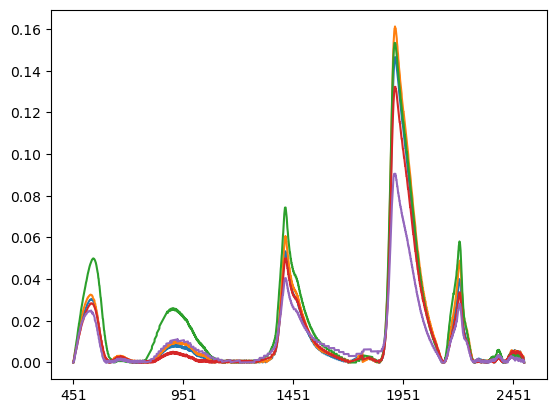

In [18]:
cr_spec = continuum_removed(spec2[51])

for i in range (0,5,1):
    cr_spec.iloc[i,:].plot()
    

## log(1/R) Transformation

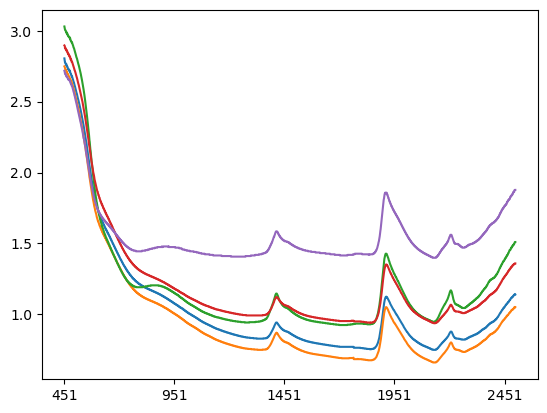

In [19]:
log_spec = ((1/spec2[51]).apply(np.log)).copy()
#log_spec.head(5)

for i in range (0,5,1):
    log_spec.iloc[i,:].plot()   

## Resampling (n_bands)

### 1. Sampled Original (sampled_spec: sampled clipped_spectra)

In [20]:
sampled_spec = {}
for n in nbands_sampling:
    sampled_spec[n] = resample_spectra (spec2[51], n)

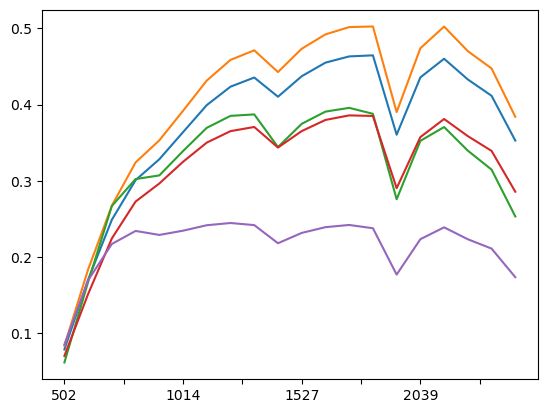

In [21]:
for i in range (0,5,1):
    sampled_spec[20].iloc[i,:].plot()

### 2. Sampled Continuum Removed  (sampled_cr)

In [22]:
sampled_cr = {}
for n in nbands_sampling:
    sampled_cr[n] = resample_spectra (cr_spec, n)

KeyboardInterrupt: 

In [ ]:
for i in range (0,5,1):
    sampled_cr[20].iloc[i,:].plot()

### 3. Sampled FOD  (fod_sampled)

In [ ]:
fod_sampled = {}
for n in nbands_sampling:
    fod_sampled[n] = fod (sampled_spec[n])

In [ ]:
for i in range (0,10,1):
    fod_sampled[20].iloc[i,:].plot()

## 4. Sampled Log (sampled_log)

In [ ]:
sampled_log = {}
for n in nbands_sampling:
    sampled_log[n] = resample_spectra (log_spec, n)

In [ ]:
for i in range (0,10,1):
    sampled_log[15].iloc[i,:].plot()

## Visualizing Processed Spectrum (variable samples)

In [ ]:
def plot_spec (sample, process):
    x1 = spec2[51].iloc[sample,:]
    x1.plot()
    if process == 'cr':
        x2 = cr_spec.iloc[sample,:]
        x2.plot()
    elif process == 'fod2':
        x3 = fod_spec.iloc[sample,:]*100
        x3.plot()
    else:
        x4 = log_spec.iloc[sample,:]/3
        x4.plot()
        
    plt.ylim([-0.6, 0.9])

ipywidgets.interact(plot_spec, sample = (0, 85,1), process = prepare_spec)

## Correlation between wavelengths and Targets

In [ ]:
plt.style.use(['science','notebook','grid'])

def plot_corr (target, prepare, n_bands):
    
    i = target_names.index(target)    
    
    if  prepare == 'spec':
        r_val, p_val = find_rpval (sampled_spec[n_bands], T[i])
        r_val.iloc[0,:].plot(color = clr[i])
    elif  prepare == 'cr':
        r_cr, p_cr = find_rpval (sampled_cr[n_bands], T[i])
        r_cr.iloc[0,:].plot(color = clr[i])
    elif prepare == 'fod2':    
        r_fod, p_fod = find_rpval (fod_sampled[n_bands], T[i])
        r_fod.iloc[0,:].plot(color = clr[i])    
    else:
        r_log, p_log = find_rpval (sampled_log[n_bands], T[i])
        r_log.iloc[0,:].plot(color = clr[i])
    
    plt.ylim([-0.9, 0.9])


ipywidgets.interact(plot_corr, target = target_names, prepare = prepare_spec, n_bands = nbands_sampling)



# Step 2:  Parameters for Best Train-Test Split  

In [ ]:
tst_siz = 0.20

rand_t = [None] * (len(T))
err_t = [None] * (len(T))

print('Without Normalization:')
for i in range (0,len(T)):
    rand_t[i], err_t[i] = best_split(spectra.copy(), T[i], tst_siz) 
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_t[i], '\t at randome state =', rand_t[i])
    
rand_nt = [None] * (len(T))
err_nt = [None] * (len(T))

print('After Normalization:')
for i in range (0,len(T)):
    rand_nt[i], err_nt[i] = best_split(spectra.copy(), NT[i], tst_siz)     
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_nt[i], '\t at randome state =', rand_nt[i])
    
    

In [ ]:
Data = {'spectra' : spec2[51], 'T' : T, 'NT' : NT, 'spec1': spec1, 'spec2': spec2, 'smth_spec' : smth_spec, 'fod_spec' : fod_spec,  \
       'cr_spec' : cr_spec,  'log_spec' : log_spec, 'sampled_spec' : sampled_spec, 'sampled_cr' : sampled_cr, \
        'fod_sampled' : fod_sampled, 'sampled_log' : sampled_log, 'rand_t' : rand_t, 'rand_nt' : rand_nt}

In [ ]:
with open ('data.pickle', 'wb') as file:
    pickle.dump(Data, file)